#**Install Library**

In [1]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 36.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.0 MB/s eta 0:00:00


#**Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [3]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)
df.head(15)

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1968 - 2018
df_selected = df[(df['time'].dt.year >= 1968) & (df['time'].dt.year <= 2018)]

# Tampilkan lima baris pertama dari data terpilih
df = df_selected
df.head(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01 07:50:51.240000+00:00,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.7355,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01 11:34:43.790000+00:00,33.468333,-120.179500,6.0,2.59,mh,4.0,302.0,1.0440,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02 09:50:46.470000+00:00,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.3567,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02 11:01:19.830000+00:00,35.740667,-118.060833,6.0,2.88,ml,10.0,97.0,0.3452,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04 06:12:39.730000+00:00,35.111000,-119.085833,6.0,2.59,ml,9.0,146.0,0.2834,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci


In [4]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'place','depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df_selected_columns.head(10)

,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1968-01-01 07:50:51.240000+00:00,32.958667,-115.863333,"24km WSW of Westmorland, CA",6.00,3.08,ml,ci,ci3329310,2016-01-28T19:54:48.710Z,earthquake,reviewed,ci,ci
1,1968-01-01 11:34:43.790000+00:00,33.468333,-120.179500,"53km S of Santa Rosa Is., CA",6.00,2.59,mh,ci,ci3342099,2016-01-28T19:37:37.050Z,earthquake,reviewed,ci,ci
2,1968-01-02 09:50:46.470000+00:00,35.705167,-118.039000,"22km WNW of Inyokern, CA",6.00,3.09,ml,ci,ci3329312,2016-01-28T19:33:22.000Z,earthquake,reviewed,ci,ci
3,1968-01-02 11:01:19.830000+00:00,35.740667,-118.060833,"25km WNW of Inyokern, CA",6.00,2.88,ml,ci,ci3329313,2016-01-28T19:59:01.740Z,earthquake,reviewed,ci,ci
4,1968-01-04 06:12:39.730000+00:00,35.111000,-119.085833,"23km SW of Lamont, CA",6.00,2.59,ml,ci,ci3329314,2016-01-28T19:54:49.210Z,earthquake,reviewed,ci,ci
5,1968-01-04 06:19:26.850000+00:00,35.118333,-119.099167,"23km SW of Lamont, CA",6.00,2.37,ml,ci,ci3329315,2016-01-28T19:50:28.820Z,earthquake,reviewed,ci,ci
6,1968-01-04 11:37:09.810000+00:00,32.276000,-117.088833,"8km SW of Rosarito, B.C., MX",6.00,3.31,ml,ci,ci3329317,2016-01-28T19:37:37.540Z,earthquake,reviewed,ci,ci
7,1968-01-05 10:50:56.490000+00:00,35.687500,-118.114000,"28km W of Inyokern, CA",6.00,2.84,ml,ci,ci3329319,2016-01-28T19:41:48.200Z,earthquake,reviewed,ci,ci
8,1968-01-06 00:26:00.650000+00:00,35.089833,-119.059167,"20km NW of Grapevine, CA",5.00,3.01,ml,ci,ci3329320,2016-01-28T19:41:48.730Z,earthquake,reviewed,ci,ci
9,1968-01-09 23:06:13.520000+00:00,34.863833,-118.734833,"12km ENE of Lebec, CA",0.38,2.21,mh,ci,ci3329322,2016-01-28T19:59:02.950Z,earthquake,reviewed,ci,ci


In [5]:
df = df_selected_columns

In [6]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def avalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return a

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    earthquake_dataset['a-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=avalue_OLS,raw = False).shift(1)
    earthquake_dataset['Max magnitude expected'] = earthquake_dataset['a-value']/earthquake_dataset['b-value']

    return earthquake_dataset

In [7]:
california_region = df[df.mag >= 4.0].reset_index(drop = True)

In [8]:
california_region = generate_GR_Adeli_Panakkat_features(california_region, 50)

In [9]:
california_region.tail()

,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected
1310,2018-08-29 02:33:28.330000+00:00,34.136333,-117.774667,"4km N of La Verne, CA",5.46,4.38,mw,ci,ci38038071,2018-12-19T23:11:11.124Z,earthquake,reviewed,ci,ci,1.257576,6.701348,5.328783
1311,2018-09-29 02:17:46.720000+00:00,32.347667,-115.184000,"1km SE of Delta, B.C., MX",28.67,4.41,mw,ci,ci37373442,2018-12-01T16:43:15.040Z,earthquake,reviewed,ci,ci,1.265668,6.744524,5.328827
1312,2018-11-19 20:18:42.510000+00:00,32.206500,-115.253500,"8km WSW of Alberto Oviedo Mota, B.C., MX",10.95,4.82,mw,ci,ci38138175,2019-02-02T20:02:26.040Z,earthquake,reviewed,ci,ci,1.272071,6.783193,5.332402
1313,2018-11-27 13:07:12.830000+00:00,36.073500,-120.188167,"9km NW of Avenal, CA",10.80,4.00,mw,nc,nc73116386,2019-02-09T19:02:10.040Z,earthquake,reviewed,nc,nc,1.268823,6.769767,5.335469
1314,2018-12-05 21:40:16.620000+00:00,35.730333,-117.077667,"28km E of Trona, CA",0.84,4.20,mw,ci,ci38386960,2019-02-16T19:52:25.040Z,earthquake,reviewed,ci,ci,1.256775,6.710128,5.339164


#**Variasi Spasial nilai b**

In [10]:
df = california_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected,year
0,1968-03-28 21:21:33+00:00,34.046167,-116.080333,"10km S of Twentynine Palms, CA",6.0,4.13,ml,ci,ci3329115,2016-01-28T19:41:52.260Z,earthquake,reviewed,ci,ci,NaN,NaN,NaN,1968
1,1968-04-09 02:28:59.610000+00:00,33.179833,-116.103000,"5km NNE of Ocotillo Wells, CA",10.0,6.60,mw,ci,ci3329122,2018-03-09T15:29:47.278Z,earthquake,reviewed,ci,ci,NaN,NaN,NaN,1968
2,1968-04-09 02:33:09+00:00,33.166667,-116.116667,"3km NNE of Ocotillo Wells, CA",0.0,4.30,mh,ci,ci10084414,2016-01-28T19:56:18.540Z,earthquake,reviewed,ci,ci,NaN,NaN,NaN,1968
3,1968-04-09 02:39:28.520000+00:00,33.166667,-116.116667,"3km NNE of Ocotillo Wells, CA",6.0,4.23,ml,ci,ci3329229,2016-01-28T19:37:41.530Z,earthquake,reviewed,ci,ci,NaN,NaN,NaN,1968
4,1968-04-09 03:03:51.090000+00:00,32.874667,-116.150167,"21km NW of Ocotillo, CA",6.0,5.20,mh,ci,ci10084422,2016-04-02T19:57:49.408Z,earthquake,reviewed,ci,ci,NaN,NaN,NaN,1968


In [11]:
# Load dataset
fixkolom = california_region

# Ekstrak nama kota dari kolom 'place'
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

In [12]:
#reduksi kolom
fixkolom = california_region[['time','latitude', 'longitude', 'place','city','depth', 'mag','magType','year','a-value','b-value']]
fixkolom.head(10)

,time,latitude,longitude,place,city,depth,mag,magType,year,a-value,b-value
0,1968-03-28 21:21:33+00:00,34.046167,-116.080333,"10km S of Twentynine Palms, CA",Twentynine Palms,6.0,4.13,ml,1968,NaN,NaN
1,1968-04-09 02:28:59.610000+00:00,33.179833,-116.103000,"5km NNE of Ocotillo Wells, CA",Ocotillo Wells,10.0,6.60,mw,1968,NaN,NaN
2,1968-04-09 02:33:09+00:00,33.166667,-116.116667,"3km NNE of Ocotillo Wells, CA",Ocotillo Wells,0.0,4.30,mh,1968,NaN,NaN
3,1968-04-09 02:39:28.520000+00:00,33.166667,-116.116667,"3km NNE of Ocotillo Wells, CA",Ocotillo Wells,6.0,4.23,ml,1968,NaN,NaN
4,1968-04-09 03:03:51.090000+00:00,32.874667,-116.150167,"21km NW of Ocotillo, CA",Ocotillo,6.0,5.20,mh,1968,NaN,NaN
5,1968-04-09 03:48:11.390000+00:00,33.068667,-116.025333,"13km SE of Ocotillo Wells, CA",Ocotillo Wells,6.0,4.54,ml,1968,NaN,NaN
6,1968-04-09 03:58:36.060000+00:00,33.013333,-115.978833,"20km SE of Ocotillo Wells, CA",Ocotillo Wells,6.0,4.14,ml,1968,NaN,NaN
7,1968-04-09 08:00:38.240000+00:00,32.998667,-115.980833,"21km SE of Ocotillo Wells, CA",Ocotillo Wells,6.0,4.08,ml,1968,NaN,NaN
8,1968-04-09 18:31:04.210000+00:00,33.296333,-116.291500,"9km ENE of Borrego Springs, CA",Borrego Springs,14.0,4.45,ml,1968,NaN,NaN
9,1968-04-14 12:55:59.500000+00:00,33.229167,-116.218167,"12km NW of Ocotillo Wells, CA",Ocotillo Wells,11.0,4.33,ml,1968,NaN,NaN


In [13]:
fixkolom = fixkolom.dropna()
fixkolom

,time,latitude,longitude,place,city,depth,mag,magType,year,a-value,b-value
50,1971-02-09 14:04:35.980000+00:00,34.416000,-118.370000,"10km SSW of Agua Dulce, CA",Agua Dulce,6.00,4.20,mh,1971,4.060424,0.611916
51,1971-02-09 14:04:37.640000+00:00,34.416000,-118.370000,"10km SSW of Agua Dulce, CA",Agua Dulce,6.00,4.10,mh,1971,4.057577,0.611353
52,1971-02-09 14:04:42.340000+00:00,34.416000,-118.370000,"10km SSW of Agua Dulce, CA",Agua Dulce,6.00,4.20,mh,1971,4.440794,0.703422
53,1971-02-09 14:04:44.080000+00:00,34.416000,-118.370000,"10km SSW of Agua Dulce, CA",Agua Dulce,6.00,4.10,mh,1971,4.429935,0.701460
54,1971-02-09 14:04:46+00:00,34.411167,-118.400667,"10km E of Santa Clarita, CA",Santa Clarita,6.00,4.20,mh,1971,4.415478,0.698739
...,...,...,...,...,...,...,...,...,...,...,...
1310,2018-08-29 02:33:28.330000+00:00,34.136333,-117.774667,"4km N of La Verne, CA",La Verne,5.46,4.38,mw,2018,6.701348,1.257576
1311,2018-09-29 02:17:46.720000+00:00,32.347667,-115.184000,"1km SE of Delta, B.C., MX",Delta,28.67,4.41,mw,2018,6.744524,1.265668
1312,2018-11-19 20:18:42.510000+00:00,32.206500,-115.253500,"8km WSW of Alberto Oviedo Mota, B.C., MX",Alberto Oviedo Mota,10.95,4.82,mw,2018,6.783193,1.272071
1313,2018-11-27 13:07:12.830000+00:00,36.073500,-120.188167,"9km NW of Avenal, CA",Avenal,10.80,4.00,mw,2018,6.769767,1.268823


In [14]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['b-value'].aggregate(['mean','min','max','sum'])

print(result)

          mean       min       max         sum
year                                          
1971  0.722664  0.611353  1.070599   31.074570
1972  1.048380  1.045902  1.050520    4.193521
1973  1.108094  0.944600  1.413255   13.297125
1974  1.012293  0.933659  1.067836   16.196681
1975  1.117932  0.974723  1.349653   44.717274
1976  1.206418  1.166008  1.282191   22.921938
1977  1.194784  1.185041  1.205071    5.973921
1978  1.223504  1.182460  1.269783   14.682043
1979  0.900005  0.754963  1.205469   36.900219
1980  0.704364  0.673245  0.757474    5.634913
1981  0.669576  0.654731  0.693547    8.704488
1982  0.738014  0.652540  0.784926   16.974326
1983  0.691478  0.612290  0.754009   32.499450
1984  0.880081  0.697906  1.053660   13.201222
1985  1.019567  0.949540  1.066782   17.332638
1986  0.901342  0.845863  1.014754   18.928182
1987  0.708019  0.607107  0.888583   24.780678
1988  0.657352  0.644740  0.666725    9.860273
1989  0.698023  0.665491  0.720649   11.168372
1990  0.96984

In [15]:
b_tot = fixkolom.groupby("year")["b-value"].sum()

b_ave = result["sum"].mean()

#**Spasial variation using values-b**

In [16]:
import geopandas as gpd

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/california-counties.geojson"
california_map = gpd.read_file(geojson_url)

california_map.head(10)

,name,cartodb_id,created_at,updated_at,geometry
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884..."
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7..."
2,Amador,3,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5..."
3,Butte,4,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3..."
4,Calaveras,5,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0..."
5,Colusa,6,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-122.24852 39.38496, -122.13601 39.3..."
6,Contra Costa,7,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-121.61515 38.09960, -121.5992..."
7,Del Norte,8,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-123.51791 42.00085, -123.51985 41.9..."
8,Tuolumne,55,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.50044 38.00663, -120.49206 38.0..."
9,El Dorado,9,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.18410 39.03101, -120.18356 39.0..."


<ipython-input-17-76010147e949>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['name']):


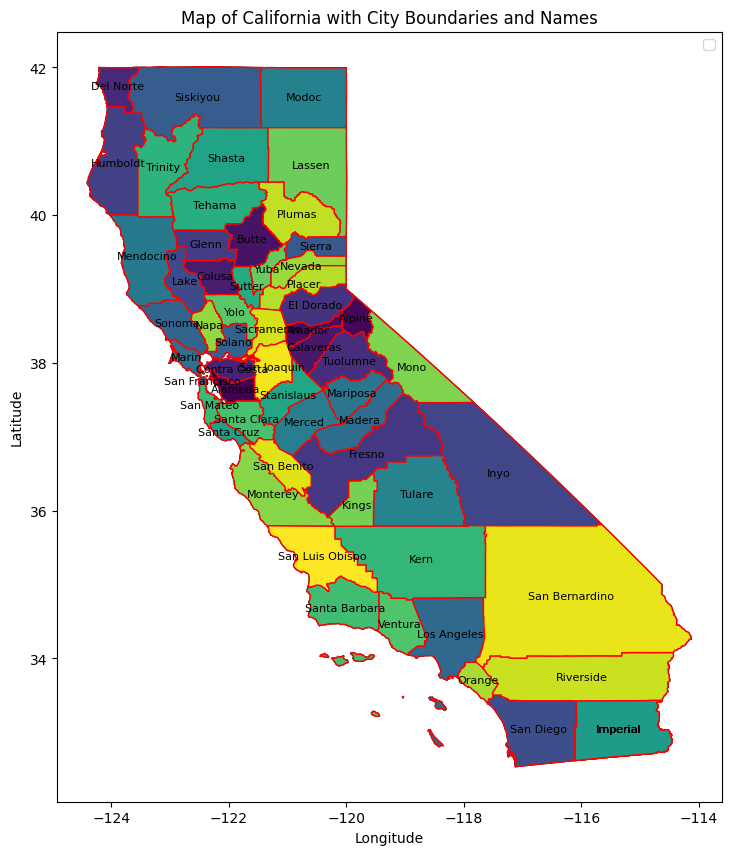

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/california-counties.geojson"
california_map = gpd.read_file(geojson_url)

# Extract city names from the 'place' column
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

# Merge the GeoJSON data with your DataFrame
merged_data = california_map.merge(fixkolom, how='left', left_on='name', right_on='city')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Differentiate areas by color
california_map.plot(ax=ax, color='white', edgecolor='black')
merged_data.plot(ax=ax, cmap='viridis', edgecolor='red', linewidth=1, legend=True)

# Add city names as legend
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add labels and title
plt.title('Map of California with City Boundaries and Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-18-b2870ffa29f0>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(data_values))


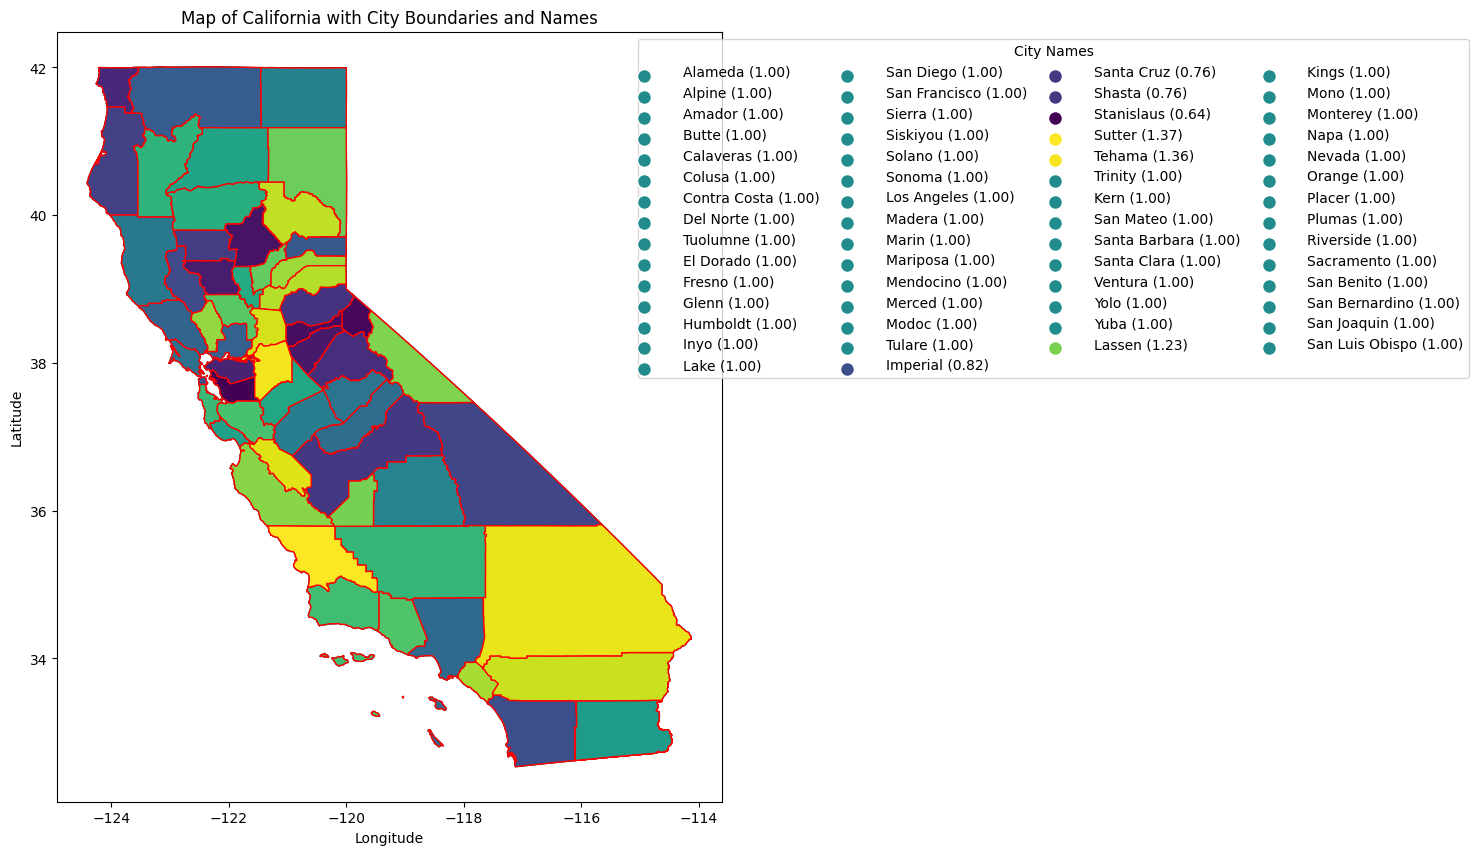

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/california-counties.geojson"
california_map = gpd.read_file(geojson_url)

# Extract city names from the 'place' column
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

# Merge the GeoJSON data with your DataFrame
merged_data = california_map.merge(fixkolom, how='left', left_on='name', right_on='city')

# Handle NaN values in the 'b-value' column
merged_data['b-value'].fillna(merged_data['b-value'].mean(), inplace=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Differentiate areas by color
cmap = 'viridis'
california_map.plot(ax=ax, color='white', edgecolor='black')
merged_data.plot(ax=ax, cmap=cmap, edgecolor='red', linewidth=1)

# Extract unique city names and their corresponding colors from the colormap
city_names = merged_data['name'].unique()

# Replace 'value' with the actual column name in your dataset
data_values = merged_data['b-value']  # Replace 'b-value' with your actual column name

# Normalize colormap to match data values
norm = Normalize(vmin=data_values.min(), vmax=data_values.max())
colors = plt.cm.get_cmap(cmap)(norm(data_values))

# Define a custom legend handler
class CityLegendHandler(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        marker_size = 10
        color = orig_handle.get_markerfacecolor()
        marker = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=marker_size)
        return [marker]

# Add city names and 'b-value' as custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                          label=f'{name} ({value:.2f})')
                   for name, color, value in zip(city_names, colors, data_values)]

ax.legend(handles=legend_elements, title='City Names', handler_map={Line2D: CityLegendHandler()}, ncol=4, loc='upper center', bbox_to_anchor=(1.5, 1))

# Add labels and title
plt.title('Map of California with City Boundaries and Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
